In [1]:
import numpy as np

In [2]:
from numpy import linalg as LA

**1.** Rešiti sledeći sistem jednačina dat u matričnom obliku: \\
$\begin{bmatrix} 2 & 0 \\ -1 & 1 \\ 0 & 2 \end{bmatrix}$$\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}$ =
$\begin{bmatrix} 2 \\ 0 \\ -2 \end{bmatrix}$



In [4]:
# Ax = b
A = np.array([[2, 0], [-1, 1], [0, 2]])
b = np.array([2, 0, -2])

In [5]:
x = LA.inv(A.T.dot(A)).dot(A.T).dot(b)
x

array([ 0.66666667, -0.66666667])

In [6]:
# suma kvadrata reziduala
rss = LA.norm(b - A.dot(x))**2
rss

2.6666666666666665

In [7]:
x, rss, rank, s = LA.lstsq(A, b, rcond=None)

In [8]:
x

array([ 0.66666667, -0.66666667])

In [9]:
rss

array([2.66666667])

**2.** Odrediti koeficijente $β_0$ i $β_1$ tako da funkcija $f(x)=β_0+β_1*x$ u smislu metode najmanjih kvadrata najbolje aproksimira skup tačaka (0, 1.2), (0.5, 2.05), (1, 2.9) i (−0.5, 0.1) u ravni.

In [3]:
points = [[0, 1.2], [0.5, 2.05], [1, 2.9], [-0.5, 0.1]]
x = np.array([p[0] for p in points])
y = np.array([p[1] for p in points])

v_ones = np.ones(x.shape[0])
A = np.vstack((v_ones, x)).T

beta_0, beta_1 = LA.lstsq(A, y, rcond=None)[0]
(beta_0, beta_1)

(1.1000000000000003, 1.85)

**3.** Odrediti koeficijente $β_0$, $β_1$ i $β_2$ tako da funkcija $f(x)=β_0+β_1*x+β_2*x^2$ u smislu metode najmanjih kvadrata najbolje aproksimira skup tačaka (0, 1.2), (0.5, 2.05), (1, 2.9) i (−0.5, 0.1) u ravni.

In [6]:
points = [[0, 1.2], [0.5, 2.05], [1, 2.9], [-0.5, 0.1]]
x = np.array([p[0] for p in points])
y = np.array([p[1] for p in points])

v_ones = np.ones(x.shape[0])
A = np.vstack((v_ones, x, x*x)).T

beta_0, beta_1, beta_2 = LA.lstsq(A, y, rcond=None)[0]
(beta_0, beta_1, beta_2)

(1.1624999999999994, 1.974999999999999, -0.24999999999999933)

**4.** Odrediti koeficijente a, b i c funkcije f(x,y)=a+bx+cy tako da u smislu metode najmanjih kvadrata aproksimira skup tacaka (3, 3, −1), (5, 3, 1) i (3, 4, 2) u prostoru.

In [9]:
points = [[3, 3, -1], [5, 3, 1], [3, 4, 2]]
x = np.array([p[0] for p in points])
y = np.array([p[1] for p in points])
z = np.array([p[2] for p in points])

v_ones = np.ones(x.shape[0])
A = np.vstack((v_ones, x, y)).T

a, b, c = LA.lstsq(A, z, rcond=None)[0]
(a, b, c)

(-12.999999999999982, 0.9999999999999987, 2.9999999999999987)

**5.** Odrediti vrednosti koeficijenata a i b tako da funkcija f(x)=a+bsinx u smislu metode najmanjih kvadrata aproksimira skup tacaka (2, 2.6), (−1.22, −1.7), (8.32, 2.5) i (4.23, −1.6) u ravni. Dati ocenu greske. Prikazati skup tačaka i nacrtati rezultujucu funkciju.

In [10]:
from matplotlib import pyplot as plt

In [12]:
points = [[2, 2.6], [-1.22, -1.7], [8.32, 2.5], [4.23, -1.6]]
x = np.array([p[0] for p in points])
y = np.array([p[1] for p in points])

v_ones = np.ones(x.shape[0])
A = np.vstack((v_ones, np.sin(x))).T

a, b = LA.lstsq(A, y, rcond=None)[0]
(a, b)

(0.4629244420449794, 2.315513480740615)

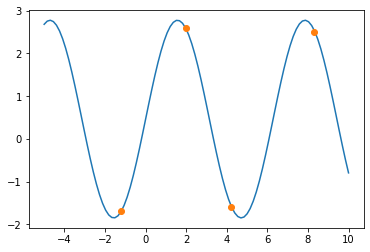

In [13]:
x_plot = np.linspace(-5, 10, 100)
y_plot = a + b * np.sin(x_plot)

plt.plot(x_plot, y_plot)
plt.plot(x, y, 'o')
plt.show()

**6.** U datoteci social_reach.csv se nalaze cene reklamiranja za različite demografske grupe, koje su date u hiljadama evra za 1000 pregleda. Svaka od tri kolone označava različitu platformu za reklamiranje (na primer, platforme mogu biti Facebook, Instagram ili YouTube). Svaki red označava različitu demografsku grupu, koja može npr. biti posebna država u kojoj se reklama plasira. Potrebno je odrediti iznos sredstava da se ostvari približno milion pregleda za svaku demografsku grupu, gledajući po svim platformama ukupno.

In [14]:
import pandas as pd

In [15]:
data = pd.read_csv('social_reach.csv')
data

,web1,web2,web3
0,0.97,1.86,0.41
1,1.23,2.18,0.53
2,0.80,1.24,0.62
3,1.29,0.98,0.51
4,1.10,1.23,0.69
5,0.67,0.34,0.54
6,0.87,0.26,0.62
7,1.10,0.16,0.48
8,1.92,0.22,0.71
9,1.29,0.12,0.62


In [17]:
A = data[['web1', 'web2', 'web3']]

In [18]:
b = 1000 * np.ones(10)

In [19]:
x = LA.lstsq(A, b, rcond=None)[0]

In [20]:
res = pd.Series(A.dot(x))
res

0     837.749793
1    1059.025412
2    1068.201931
3     913.911256
4    1186.823691
5     854.718470
6     974.561991
7     776.843870
8    1165.598418
9     986.636273
dtype: float64

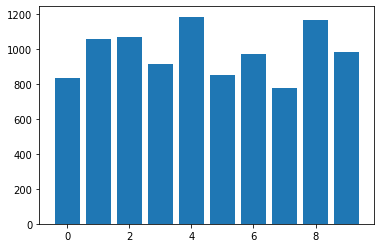

In [21]:
plt.bar(res.index, res.values)
plt.show()